#Conectamos a google drive e importamos librerias

In [ ]:
# Se conecta al Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle #para guardado de datos
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Conv2D, AveragePooling2D, BatchNormalization, Dropout, MaxPooling2D,RandomFlip,RandomRotation,MaxPool2D
from keras.applications.vgg16 import VGG16

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Para importar el Helper
%cd "/content/drive/Shareddrives/Redes neuronales/TP3"
!pip install import-ipynb
import import_ipynb
from Helper import *

/content/drive/Shareddrives/Redes neuronales/TP3
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=8fa0de0bbf2fb7e4acd6e6d90017d626d19aa29ce549eb43433c25c52b4e4e9e
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb
importing Jupyter notebook from Helper.ipynb
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   448         ['input_1[0][0]']                
                                                                                                

# Cargamos los datos

In [ ]:
X_train = np.load("/content/drive/Shareddrives/Redes neuronales/TP3/Dataset original/X_train.npy")
Y_train = np.load("/content/drive/Shareddrives/Redes neuronales/TP3/Dataset original/y_train.npy")
X_test = np.load("/content/drive/Shareddrives/Redes neuronales/TP3/Dataset original/X_test.npy")

# Dividimos entre datasets de entrenamiento y validación

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.1)

# Paso a float, normalizamos y categorizamos

In [ ]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

In [ ]:
y_train_categorical = to_categorical(y_train,100)
y_val_categorical = to_categorical(y_valid,100)

# Data Augmentation

En este caso, se hace data augmentation con ImageDataGenerator. Las imágenes del conjunto de datos no se utilizan directamente. En cambio, solo se proporcionan imágenes aumentadas al modelo. Debido a que los aumentos se realizan al azar, esto permite generar y utilizar tanto imágenes modificadas como imágenes muy parecidas a las originales (por ejemplo, casi sin aumento) durante el entrenamiento.

De esta manera se trata de mejorar el rendimiento del modelo, evitar el overfitting y aumentar la habilidad del modelo de generalizar. 

Según los parámetros especificados se puede hacer un:

* Aumento de desplazamiento horizontal y vertical: mover todos los píxeles de la imagen en una dirección, como horizontal o verticalmente, manteniendo las mismas dimensiones de la imagen.Esto significa que algunos de los píxeles se recortarán de la imagen y habrá una región de la imagen donde se deberán especificar nuevos valores de píxeles. Los argumentos width_shift_range y height_shift_range del constructor ImageDataGenerator controlan la cantidad de desplazamiento horizontal y vertical respectivamente.

* Aumento de flipping horizontal y vertical: se produce como un giro de imagen, se invierten las filas o columnas de píxeles en el caso de un giro vertical u horizontal, respectivamente. El aumento de flipping se especifica mediante un argumento booleano horizontal_flip o vertical_flip.

* Aumento de rotación aleatoria: se rota aleatoriamente la imagen en el sentido de las agujas del reloj una cantidad determinada de grados de 0 a 360. Es probable que la rotación gire los píxeles fuera del marco de la imagen y deje áreas del marco sin datos de píxeles que deban completarse.

* Aumento random del brillo: el brillo de la imagen se puede aumentar oscureciendo aleatoriamente las imágenes, iluminando las imágenes o ambos. La intención es permitir que un modelo se generalice a través de imágenes entrenadas en diferentes niveles de iluminación. Esto se puede lograr especificando el argumento de rango de brillo al constructor ImageDataGenerator () que especifica el rango mínimo y máximo como un flotante que representa un porcentaje para seleccionar una cantidad de brillo.

* Aumento de zoom aleatorio: amplía aleatoriamente la imagen y agrega nuevos valores de píxeles alrededor de la imagen o interpola los valores de píxeles, respectivamente. El zoom de la imagen se puede configurar mediante el argumento zoom_range en el constructor ImageDataGenerator. Puede especificar el porcentaje del zoom como un solo flotante o un rango como una matriz o tupla.

También se le pueden ingresar otros parámetros que permiten, por ejemplo, normalizar la imagen, entre otras cosas. 


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=True,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180) #30
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height) #0.1
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


x_train_pp = x_train
datagen.fit(x_train_pp)

# x_test_pp = x_test
# datagen.fit(x_test_pp)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


# Creación y entrenamiento del modelo de transfer learning

## Se instancia el modelo VGG16 y se cargan pesos pre entrenados con imagenet

In [ ]:
preproc=VGG16(include_top = False, pooling = None, weights="imagenet",input_shape=(32,32,3))
preproc.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

## Se congelan todas las capas en el modelo base configurando trainable= False 

In [ ]:
for layer in preproc.layers:
    layer.trainable=False

## Extacción de características: se corre el conjunto de datos por el modelo y se guardan las salidas del modelo base.

In [ ]:
x_pre_train=preproc.predict(x_train_pp)
x_pre_valid=preproc.predict(x_valid)

In [ ]:
x_pre_train[0].shape

(1, 1, 512)

## Se crea un nuevo modelo

In [ ]:
input_preproc=Input(shape=(1,1,512))

net=Flatten()(input_preproc)

net=Dense(units=256, activation='relu')(net)
net=Dropout(0.2)(net)
net=Dense(units=256, activation='relu')(net)
net=Dropout(0.2)(net)
net=Dense(units=100, activation = 'softmax')(net)

model=Model(input_preproc,net)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 1, 512)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               2570

## Se entrena el nuevo modelo con el output de modelo preentrenado

In [ ]:
# Callbacks
checkpoint_file =f"/content/drive/Shareddrives/Redes neuronales/TP3/Modelos entrenados/transfer_learning_dataaug_tere_1.hdf5"

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=2)
checkpointer = ModelCheckpoint(monitor="val_accuracy",filepath=checkpoint_file, verbose=1, save_best_only=True)

In [ ]:
batch_size = 64
epocs = 100

history = model.fit(x_pre_train, 
        y_train_categorical,
        epochs=epocs, batch_size=batch_size, 
        verbose=1, 
        validation_data = (x_pre_valid, y_val_categorical),
        callbacks=[checkpointer, earlystop],
    )

Epoch 1/100
701/704 [============================>.] - ETA: 0s - loss: 4.5589 - accuracy: 0.0269
Epoch 00001: val_accuracy improved from -inf to 0.07080, saving model to /content/drive/Shareddrives/Redes neuronales/TP3/Modelos entrenados/transfer_learning_dataaug_tere_1.hdf5
704/704 [==============================] - 4s 5ms/step - loss: 4.5585 - accuracy: 0.0271 - val_loss: 4.4324 - val_accuracy: 0.0708
Epoch 2/100
697/704 [============================>.] - ETA: 0s - loss: 4.3325 - accuracy: 0.0655
Epoch 00002: val_accuracy improved from 0.07080 to 0.10880, saving model to /content/drive/Shareddrives/Redes neuronales/TP3/Modelos entrenados/transfer_learning_dataaug_tere_1.hdf5
704/704 [==============================] - 3s 4ms/step - loss: 4.3311 - accuracy: 0.0654 - val_loss: 4.0972 - val_accuracy: 0.1088
Epoch 3/100
704/704 [==============================] - ETA: 0s - loss: 4.0319 - accuracy: 0.0909
Epoch 00003: val_accuracy improved from 0.10880 to 0.14280, saving model to /content/d

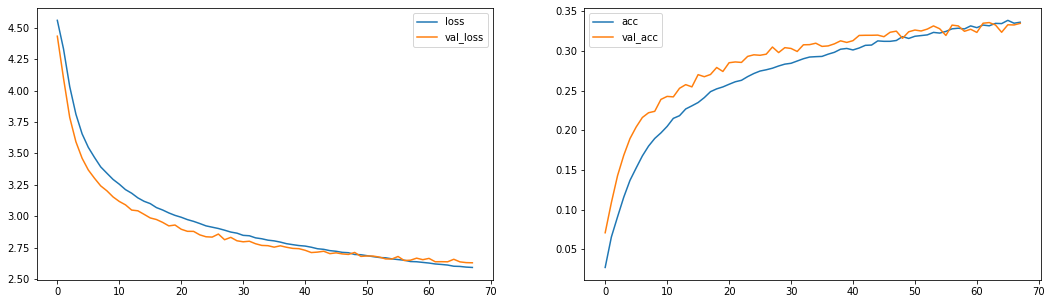

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,5))
ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()

ax2.plot(history.history['accuracy'], label="acc")
ax2.plot(history.history['val_accuracy'], label="val_acc")
ax2.legend()
plt.show();

##Fine-tuning:

Este paso es opcional, en este caso se hace, para obtener mejoras a pesar de que puede conducir a un sobreajuste rápido. En Fine tunning, se descongela parte o todo el modelo base y se vuelve a entrenar tood el modelo de principio a fin con una tasa de aprendizaje muy baja.

In [ ]:
model.load_weights(checkpoint_file)

In [ ]:
total_model_output=model(preproc.output)
total_model=Model(preproc.input,total_model_output)
total_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

###Se descongela el modelo base

In [ ]:
for layer in preproc.layers:
    layer.trainable=True
total_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

###Se vuelve a entrenar todo el modelo de principio a fin

In [ ]:
total_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Callbacks
checkpoint_file='/content/drive/Shareddrives/Redes neuronales/TP3/Modelos entrenados/cifar10-cnn-TL-VGG16_fine_tunning_tere_rotation__tere_1.hdf5'
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=2)
checkpointer = ModelCheckpoint(monitor="val_accuracy",filepath=checkpoint_file, verbose=1, save_best_only=True)

In [ ]:
batch_size = 64
epocs = 100

history = total_model.fit(x_train_pp, 
        y_train_categorical,
        epochs=epocs, batch_size=batch_size, 
        verbose=1, 
        validation_data = (x_valid, y_val_categorical),
        callbacks=[checkpointer, earlystop],
    )

Epoch 1/100
703/704 [============================>.] - ETA: 0s - loss: 2.0856 - accuracy: 0.4348
Epoch 00001: val_accuracy improved from -inf to 0.35560, saving model to /content/drive/Shareddrives/Redes neuronales/TP3/Modelos entrenados/cifar10-cnn-TL-VGG16_fine_tunning_tere_rotation__tere_1.hdf5
704/704 [==============================] - 57s 79ms/step - loss: 2.0854 - accuracy: 0.4348 - val_loss: 2.5506 - val_accuracy: 0.3556
Epoch 2/100
703/704 [============================>.] - ETA: 0s - loss: 1.8580 - accuracy: 0.4884
Epoch 00002: val_accuracy improved from 0.35560 to 0.48540, saving model to /content/drive/Shareddrives/Redes neuronales/TP3/Modelos entrenados/cifar10-cnn-TL-VGG16_fine_tunning_tere_rotation__tere_1.hdf5
704/704 [==============================] - 56s 79ms/step - loss: 1.8579 - accuracy: 0.4885 - val_loss: 1.8586 - val_accuracy: 0.4854
Epoch 3/100
703/704 [============================>.] - ETA: 0s - loss: 1.6267 - accuracy: 0.5391
Epoch 00003: val_accuracy did not im

# Resultados y conclusiones

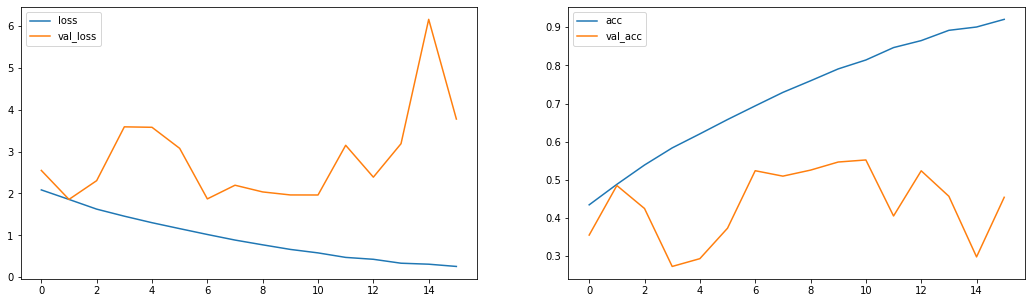

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,5))
ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()

ax2.plot(history.history['accuracy'], label="acc")
ax2.plot(history.history['val_accuracy'], label="val_acc")
ax2.legend()
plt.show();

Se ve como a pesar de que los resultados mejoran notablemente comparado a los otros modelos que no utilizan transfer learning, pero también se produce overfitting.

La mejora del accuracy también puede deberse al Data Augmentation que pudo haber generalizado más el modelo. Sin embargo se ve como se produce mucho overfitting que puede deberse tanto al Fine tunning como también a que la configuración de los parámetros de Data Augmentation no fue tan distinta a las imágenes originales o a que justo, quedaron imágenes en el conjunto de entrenamiento muy parecidas a las originales, evitando que se pueda generalizar el modelo.

# Predicción de clases y submission

In [ ]:
path_results = "/content/drive/Shareddrives/Redes neuronales/TP3/Submissions/sumbission_cnn-TL-VGG16_fine_tunning_tere_rotation__tere_1.csv"
path_model = checkpoint_file
results = predic(x_test,path_results,total_model,path_model)
results

,label
Id,
0,12
1,80
2,55
3,72
4,71
...,...
9995,83
9996,4
9997,51
